<a href="https://colab.research.google.com/github/Jaomiew/DPDM2023/blob/main/Data102(Chapter2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas

In [2]:
##table = pandas.read_csv('/content/csv')

In [3]:
##table

In [4]:
##table.shape

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
table_from_drive = pandas.read_csv('/content/drive/MyDrive/DPDM23_DATA/csv')

In [7]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,70,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


In [8]:
table_from_drive.shape

(9, 9)

In [9]:
table_from_drive.describe()

,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2565.666667,94.444444,20.444444,35.222222,1.666667,2.888889,38.333333,63.888889
std,0.500000,9.658042,3.244654,10.521143,1.000000,1.746027,7.000000,9.002700
min,2565.000000,70.000000,17.000000,27.000000,0.000000,0.000000,31.000000,47.000000
25%,2565.000000,94.000000,18.000000,28.000000,1.000000,2.000000,32.000000,60.000000
50%,2566.000000,95.000000,20.000000,30.000000,2.000000,3.000000,35.000000,62.000000
75%,2566.000000,100.000000,22.000000,39.000000,2.000000,4.500000,47.000000,69.500000
max,2566.000000,101.000000,26.000000,57.000000,3.000000,5.000000,47.000000,75.000000


In [10]:
table_from_drive.head() #ดูหัวตาราง เเสดงเเค่ข้อมูลเเค่ 5 เเถวแรก

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0


In [11]:
table_from_drive.tail() #ดูท้ายตาราง เเสดงเเค่ข้อมูลเเค่ 5 เเถวสุดท้าย

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,70,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


In [12]:
table_from_drive.head(7) # table_name.head(7) เเสดงเเค่ข้อมูลเเค่ 7 เเถวเเรก

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,70,17,29,1,1.0,32,62.0


### data Selection (indexing and slicing)

table view

In [13]:
table_from_drive['Amount_Government'][2] #indexing

94

In [14]:
table_from_drive['Amount_Government'][:2] #row slicing

0    95
1    95
Name: Amount_Government, dtype: int64

In [15]:
table_from_drive[['Amount_Government','Amount_Day_Sickleave']] #column slicing = create new table

,Amount_Government,Amount_Day_Sickleave
0,95,28
1,95,57
2,94,27
3,94,27
4,100,30
5,100,33
6,70,29
7,101,47
8,101,39


In [16]:
new_table = table_from_drive[['Amount_Government','Amount_Day_Sickleave']] #column slicing = create new table

In [17]:
new_table

,Amount_Government,Amount_Day_Sickleave
0,95,28
1,95,57
2,94,27
3,94,27
4,100,30
5,100,33
6,70,29
7,101,47
8,101,39


## array view

In [18]:
table_from_drive.iloc[2,2] #indexing

94

In [19]:
table_from_drive.iloc[2:8,2:8:2] #slicing

,Amount_Government,Amount_Day_Sickleave,Amount_ Day_Personalleave
2,94,27,4.5
3,94,27,4.5
4,100,30,5.0
5,100,33,4.0
6,70,29,1.0
7,101,47,2.0


assing value to pandas DataFrame

### 1.standard method

In [20]:
table_from_drive.loc[6,'Amount_Government'] = 83

In [21]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,83,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


### 2.table view

In [22]:
table_from_drive['Amount_Government'][6] = 84

<ipython-input-22-025bcee2802a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_from_drive['Amount_Government'][6] = 84


In [23]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,101,25,39,2,3.0,34,61.0


### 3.array view

In [24]:
table_from_drive.iloc[-1,2] = 130

In [25]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,130,25,39,2,3.0,34,61.0


# 3 Boxplot

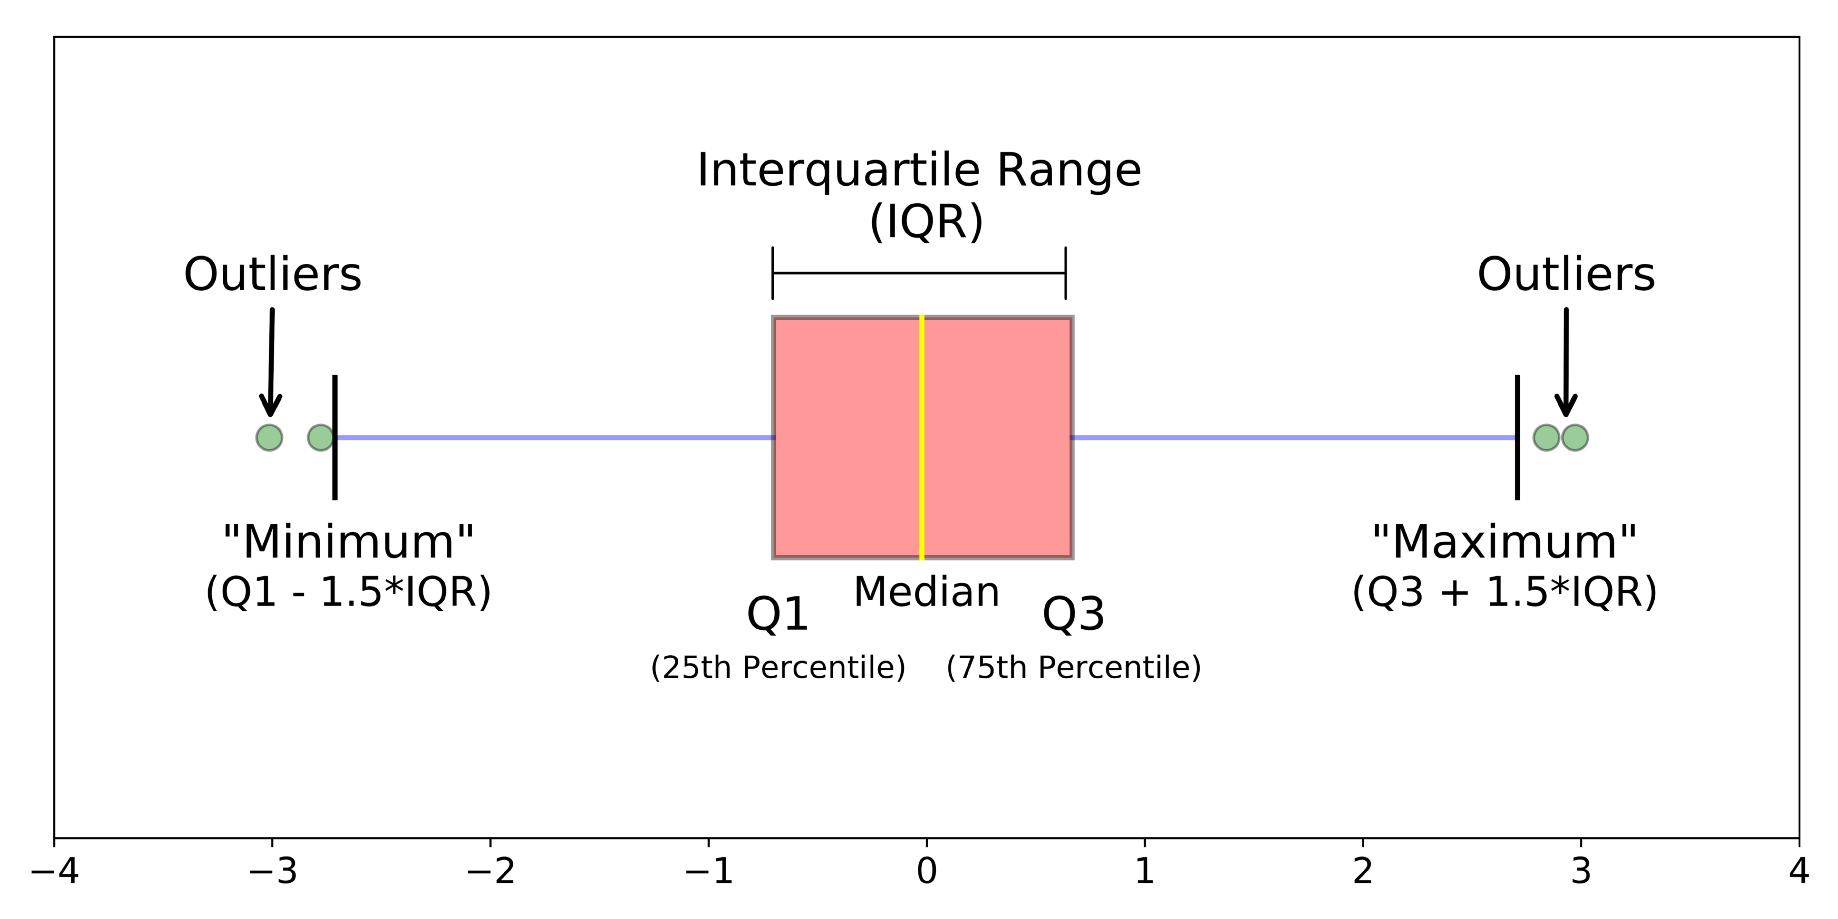

In [26]:
from matplotlib import pyplot as plt #Library: matplotlib สำหรับวาดรูป plot graph, packet : pyplot  ตั้งชื่อว่า plt

In [27]:
table_from_drive['Amount_Government']

0     95
1     95
2     94
3     94
4    100
5    100
6     84
7    101
8    130
Name: Amount_Government, dtype: int64

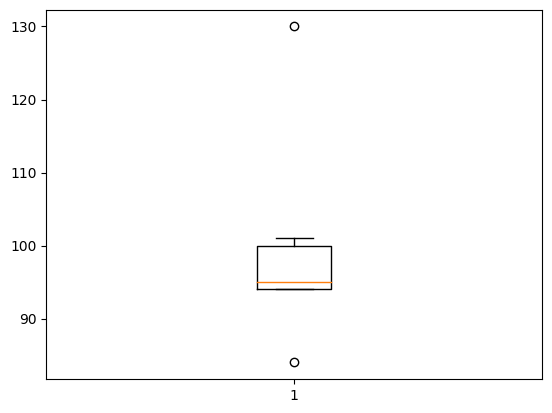

In [28]:
plt.boxplot(table_from_drive['Amount_Government']);

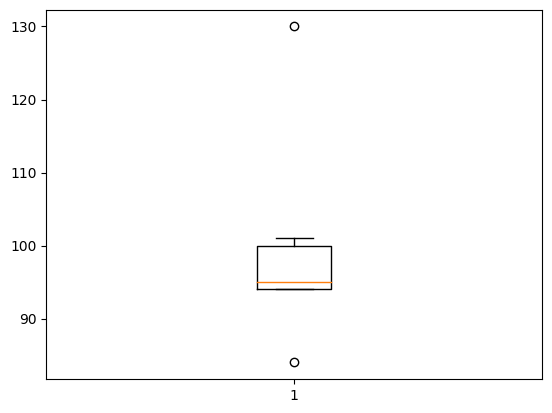

In [29]:
plt.boxplot(table_from_drive['Amount_Government']);

## take values from boxplot

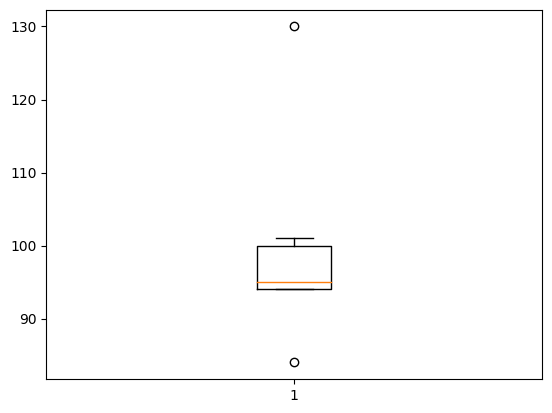

In [30]:
boxplot_output = plt.boxplot(table_from_drive['Amount_Government'])

In [31]:
boxplot_output #ดิก

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb768033730>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb768033c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb768033490>],
 'medians': [<matplotlib.lines.Line2D at 0x7cb7680701f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cb768070490>],
 'means': []}

In [32]:
boxplot_output['fliers']

In [33]:
boxplot_output['fliers'][0]

In [34]:
boxplot_output['fliers'][0].get_ydata()

array([ 84, 130])

In [35]:
boxplot_output['fliers'][0].get_ydata()[0]

84

In [36]:
boxplot_output['fliers'][0].get_ydata()[1]

130

# Querying and Filtering



```python
DataFrame[list_of_logics] #len(list_of_logics) = len(DataFrame)
```



In [37]:
table_from_drive[[False,False,False,True,False,True,False,False,False]]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0


all row that have amount_sickleave equal to 20

In [38]:
table_from_drive['Amount_Sickleave']==20

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: Amount_Sickleave, dtype: bool

In [39]:
table_from_drive[table_from_drive['Amount_Sickleave']==20]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0


## test multiple parameters

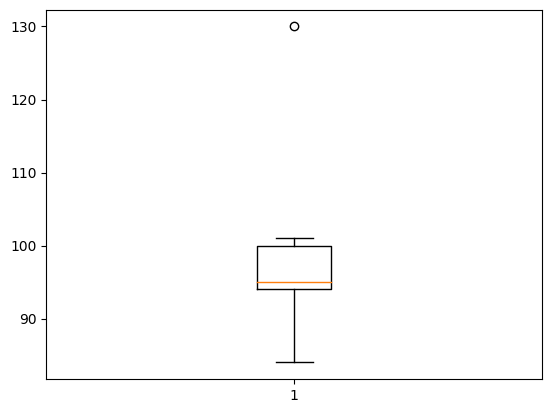

In [46]:
boxplot_output = plt.boxplot(table_from_drive['Amount_Government'],whis=2)

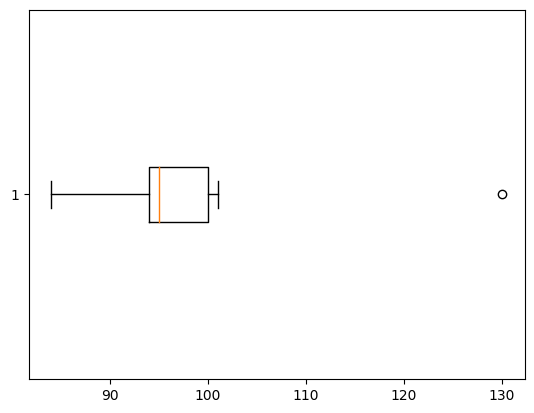

In [47]:
boxplot_output = plt.boxplot(table_from_drive['Amount_Government'],whis=2,vert=False)

# Quiz 3

filter out the outliets row ($'Amount\_Government'$)

In [40]:
table_from_drive

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0
8,มิถุนายน,2566,130,25,39,2,3.0,34,61.0


In [41]:
table_from_drive[(table_from_drive['Amount_Government'] != 83) & (table_from_drive['Amount_Government'] != 130)]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
6,เมษายน,2566,84,17,29,1,1.0,32,62.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0


เฉลย

In [42]:
boxplot_output['whiskers'][0].get_ydata()[1].min()

94.0

In [44]:
boxplot_output['whiskers'][1].get_ydata()[1].max()

101.0

In [45]:
table_from_drive[(table_from_drive['Amount_Government'] >= boxplot_output['whiskers'][0].get_ydata().min()) &
                (table_from_drive['Amount_Government'] <= boxplot_output['whiskers'][1].get_ydata().max())]

,Month_,Year_,Amount_Government,Amount_Sickleave,Amount_Day_Sickleave,Amount_ Personalleave,Amount_ Day_Personalleave,Amount_ Vacationleave,Amount_ Day_Vacationleave
0,ตุลาคม,2565,95,18,28,1,2.0,35,57.0
1,พฤศจิกายน,2565,95,20,57,0,0.0,31,47.0
2,ธันวาคม,2565,94,18,27,3,4.5,47,69.5
3,มกราคม,2566,94,18,27,3,4.5,47,69.5
4,กุมภาพันธ์,2566,100,20,30,2,5.0,32,60.0
5,มีนาคม,2566,100,22,33,2,4.0,47,75.0
7,พฤษภาคม,2566,101,26,47,1,2.0,40,74.0


# Plot all datapoints (depend on data type)

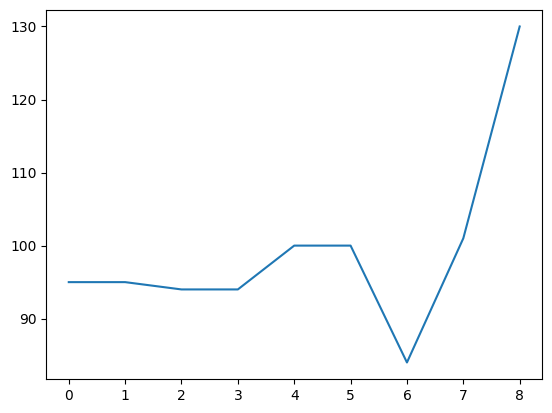

In [48]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'])

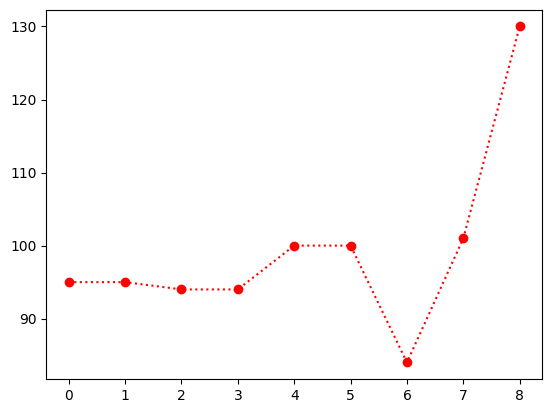

In [49]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o:r')

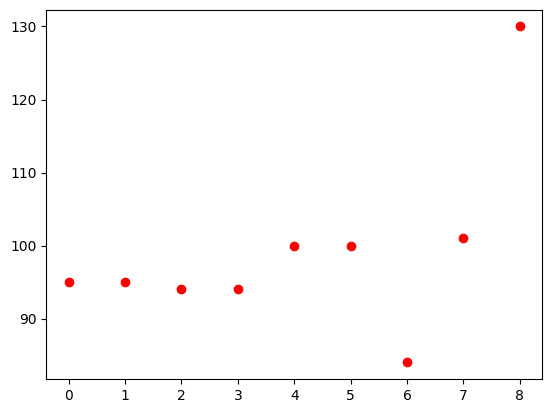

In [50]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'or')

Text(0.5, 1.0, 'Monthy Amount_Government')

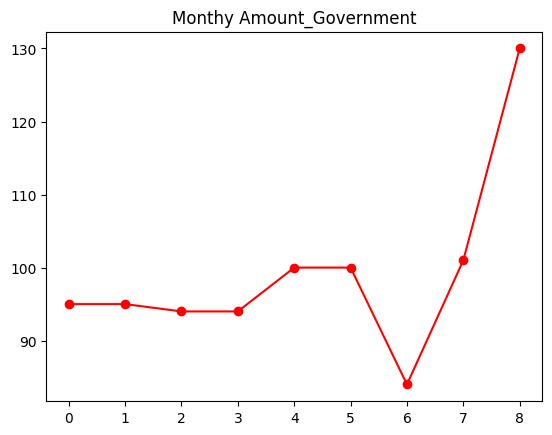

In [52]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Monthy Amount_Government')

Text(0.5, 0, 'Month')

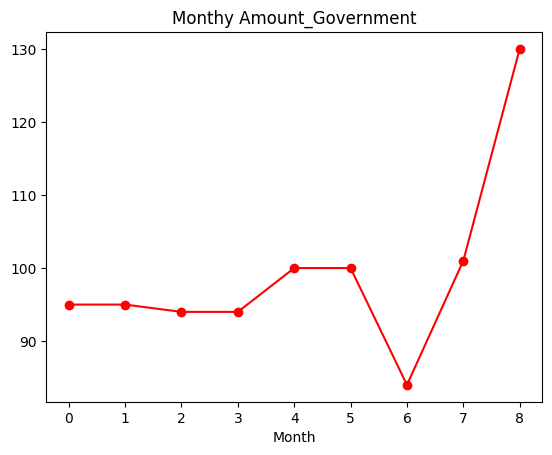

In [53]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Monthy Amount_Government')
plt.xlabel('Month')

Text(0, 0.5, 'Amount_Government')

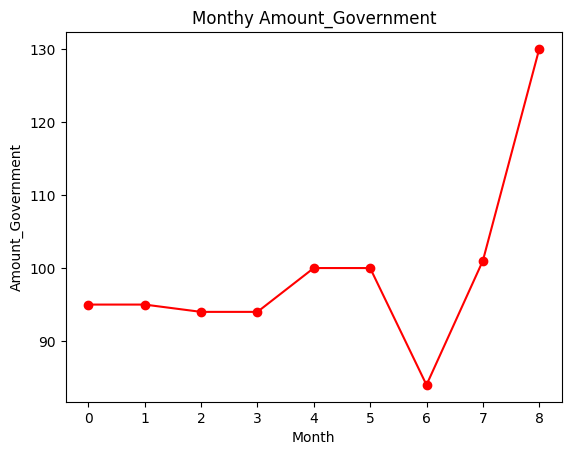

In [54]:
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Monthy Amount_Government')
plt.xlabel('Month')
plt.ylabel('Amount_Government')

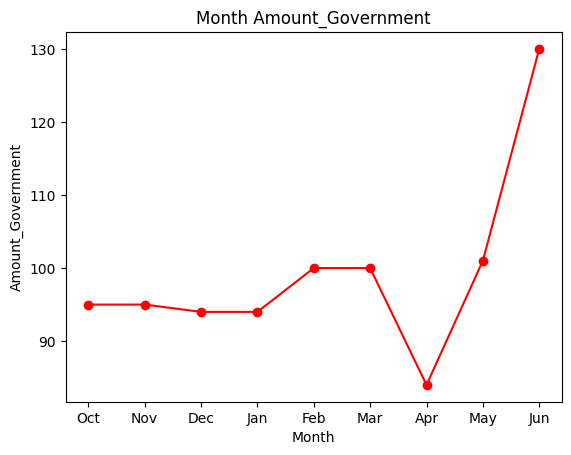

In [55]:
lebels_month=['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun']
plt.plot(range(len(table_from_drive)),table_from_drive['Amount_Government'],'o-r')
plt.title('Month Amount_Government') #create name
plt.xlabel('Month')
plt.ylabel('Amount_Government')
plt.xticks(range(len(table_from_drive)),lebels_month); #เปลี่ยนชื่อเดือนจาก 0 - 9 เป็นเดือนต่างๆ

compare 2 columns

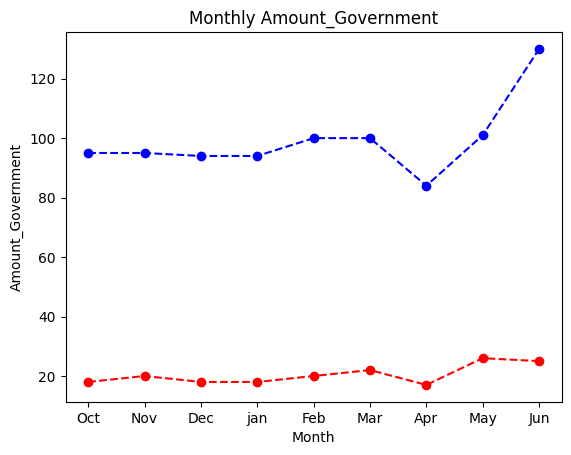

In [56]:
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Government'],'o--b')
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],'o--r')
plt.title('Monthly Amount_Government')
plt.xlabel('Month')
plt.ylabel('Amount_Government')
labels = ['Oct','Nov','Dec','jan','Feb','Mar','Apr','May','Jun']
plt.xticks(range(len(table_from_drive)),labels);

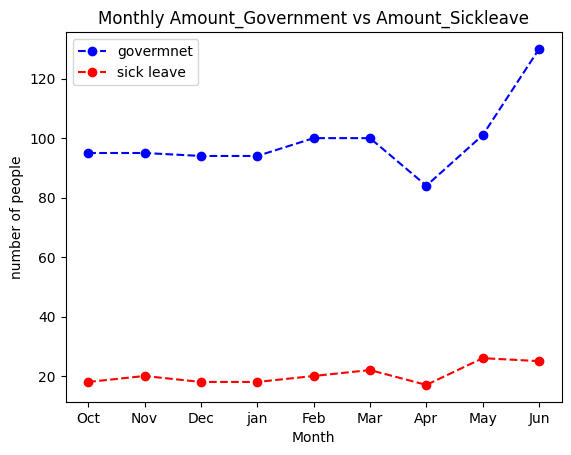

In [60]:
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Government'],'o--b',label='govermnet')
plt.plot(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],'o--r',label='sick leave')
plt.title('Monthly Amount_Government vs Amount_Sickleave')
plt.xlabel('Month')
plt.ylabel('number of people')
labels = ['Oct','Nov','Dec','jan','Feb','Mar','Apr','May','Jun']
plt.xticks(range(len(table_from_drive)),labels)
plt.legend();

# Barchart

<BarContainer object of 9 artists>

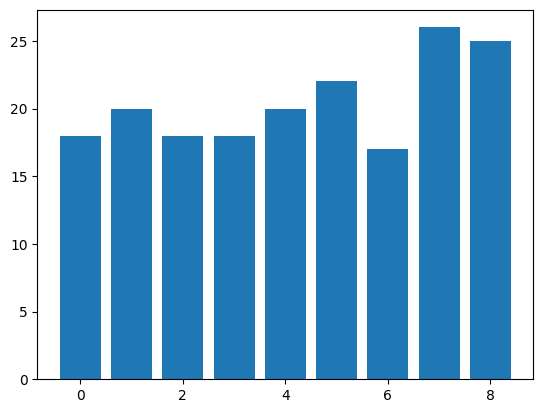

In [61]:
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'])

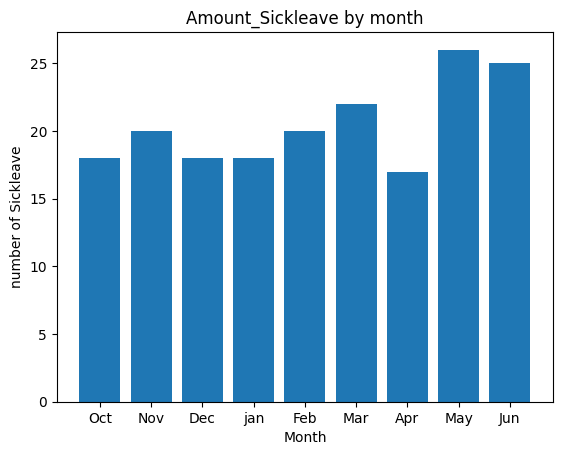

In [62]:
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'])
plt.title('Amount_Sickleave by month')
plt.xlabel('Month')
plt.ylabel('number of Sickleave')
plt.xticks(range(len(table_from_drive)),labels);

## Stacked barchart

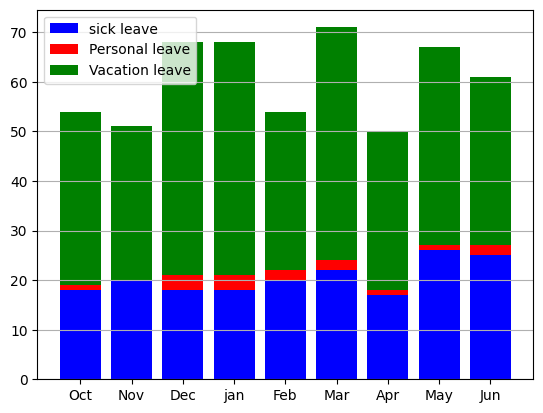

In [64]:
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],color='b',label='sick leave')
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_ Personalleave'],bottom=table_from_drive['Amount_Sickleave'],color='r',label='Personal leave')
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_ Vacationleave'],bottom=table_from_drive['Amount_ Personalleave']+table_from_drive['Amount_Sickleave'],color='g',label='Vacation leave')
plt.xticks(range(len(table_from_drive)),labels)
plt.grid(True,axis='y')
plt.legend();

In [65]:
import numpy as np
width = 0.2
np.array(range(len(table_from_drive)))-width

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8,  5.8,  6.8,  7.8])

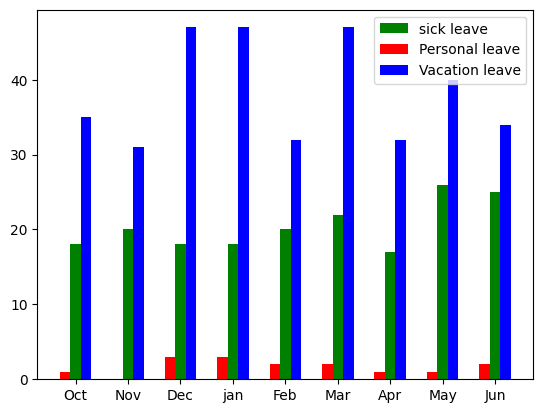

In [67]:
width = 0.2
plt.bar(range(len(table_from_drive)), table_from_drive['Amount_Sickleave'],width,color='g',label='sick leave')
plt.bar(np.array(range(len(table_from_drive)))-width, table_from_drive['Amount_ Personalleave'],width,color='r',label='Personal leave')
plt.bar(np.array(range(len(table_from_drive)))+width, table_from_drive['Amount_ Vacationleave'],width,color='b',label='Vacation leave')
plt.xticks(range(len(table_from_drive)),labels)
plt.legend();

hw3